# 12.1d — Orthographic Projections Explorer

Three stacked orthographic projections (XY, XZ, YZ) of the token galaxy.

**Features:**
- Choose any four eigenvector dimensions (X, Y, Z, W)
- W can be a dimension index OR 'r' for causal norm (radial distance)
- Color-coded by W values
- All 151,936 tokens
- Matplotlib for performance

## Configuration

In [ ]:
# Dimension selection
DIM_X = 2547
DIM_Y = 2546
DIM_Z = 2545
DIM_W = 2544

# Visualization parameters
POINT_SIZE = 0.1       # Marker size
ALPHA = 1.0            # Point transparency
COLORMAP = "managua"   # Color scheme
DPI = 300              # Figure resolution
FIGSIZE = (10, 18)     # Width, height in inches (for 3 stacked plots)

## Setup

In [73]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

## Load Data

In [74]:
# Paths
project_root = Path.cwd().parent
vectors_dir = project_root / 'data' / 'vectors'

# Load eigenbasis projections and eigenvalues
projections_data = torch.load(vectors_dir / 'token_eigenbasis_projections_qwen3_4b.pt')
eigenbasis_data = torch.load(vectors_dir / 'eigenbasis_qwen3_4b.pt')

projections = projections_data['projections']  # [151936, 2560]
eigenvalues = eigenbasis_data['eigenvalues']   # [2560]

print(f"Loaded {projections.shape[0]:,} token projections")
print(f"Eigenvector dimensions: {projections.shape[1]}")
print(f"Eigenvalue range: [{eigenvalues.min():.1f}, {eigenvalues.max():.1f}]")

Loaded 151,936 token projections
Eigenvector dimensions: 2560
Eigenvalue range: [95.4, 94217.9]


## Convert to Logometers and Prepare Color Values

In [75]:
def convert_to_logometers(projections, dim, eigenvalues):
    """
    Convert eigenbasis projections to logometer distances.
    
    Distance along eigenvector i = projection_i * sqrt(eigenvalue_i)
    """
    return projections[:, dim].numpy() * np.sqrt(eigenvalues[dim].item())

def compute_causal_norm(projections, eigenvalues):
    """
    Compute causal norm: ||v||_M = sqrt(sum(lambda_i * v_i^2))
    """
    # projections: [N, D], eigenvalues: [D]
    squared_projections = projections ** 2  # [N, D]
    weighted = squared_projections * eigenvalues.unsqueeze(0)  # [N, D]
    norms = torch.sqrt(weighted.sum(dim=1))  # [N]
    return norms.numpy()

# Convert X, Y, Z dimensions to logometers
print(f"\nConverting dimensions to logometers...")
x_coords = convert_to_logometers(projections, DIM_X, eigenvalues)
y_coords = convert_to_logometers(projections, DIM_Y, eigenvalues)
z_coords = convert_to_logometers(projections, DIM_Z, eigenvalues)

print(f"X (dim {DIM_X}): [{x_coords.min():.2f}, {x_coords.max():.2f}] logometers")
print(f"Y (dim {DIM_Y}): [{y_coords.min():.2f}, {y_coords.max():.2f}] logometers")
print(f"Z (dim {DIM_Z}): [{z_coords.min():.2f}, {z_coords.max():.2f}] logometers")

# Compute color values
if DIM_W == 'r':
    print(f"\nComputing causal norms for color...")
    color_values = compute_causal_norm(projections, eigenvalues)
    color_label = 'Causal Norm (logometers)'
else:
    print(f"\nUsing dimension {DIM_W} for color...")
    color_values = convert_to_logometers(projections, DIM_W, eigenvalues)
    color_label = f'Dimension {DIM_W} (logometers)'

print(f"Color range: [{color_values.min():.2f}, {color_values.max():.2f}]")


Converting dimensions to logometers...
X (dim 2547): [-15.97, 20.97] logometers
Y (dim 2546): [-20.80, 37.43] logometers
Z (dim 2545): [-11.97, 37.05] logometers

Using dimension 2544 for color...
Color range: [-14.87, 35.42]


## Create Three Stacked Orthographic Projections

/var/folders/k5/44vd1ct56xj4y9h7x213kvjr0000gn/T/ipykernel_87521/2408843986.py:49: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.85, 0.99])


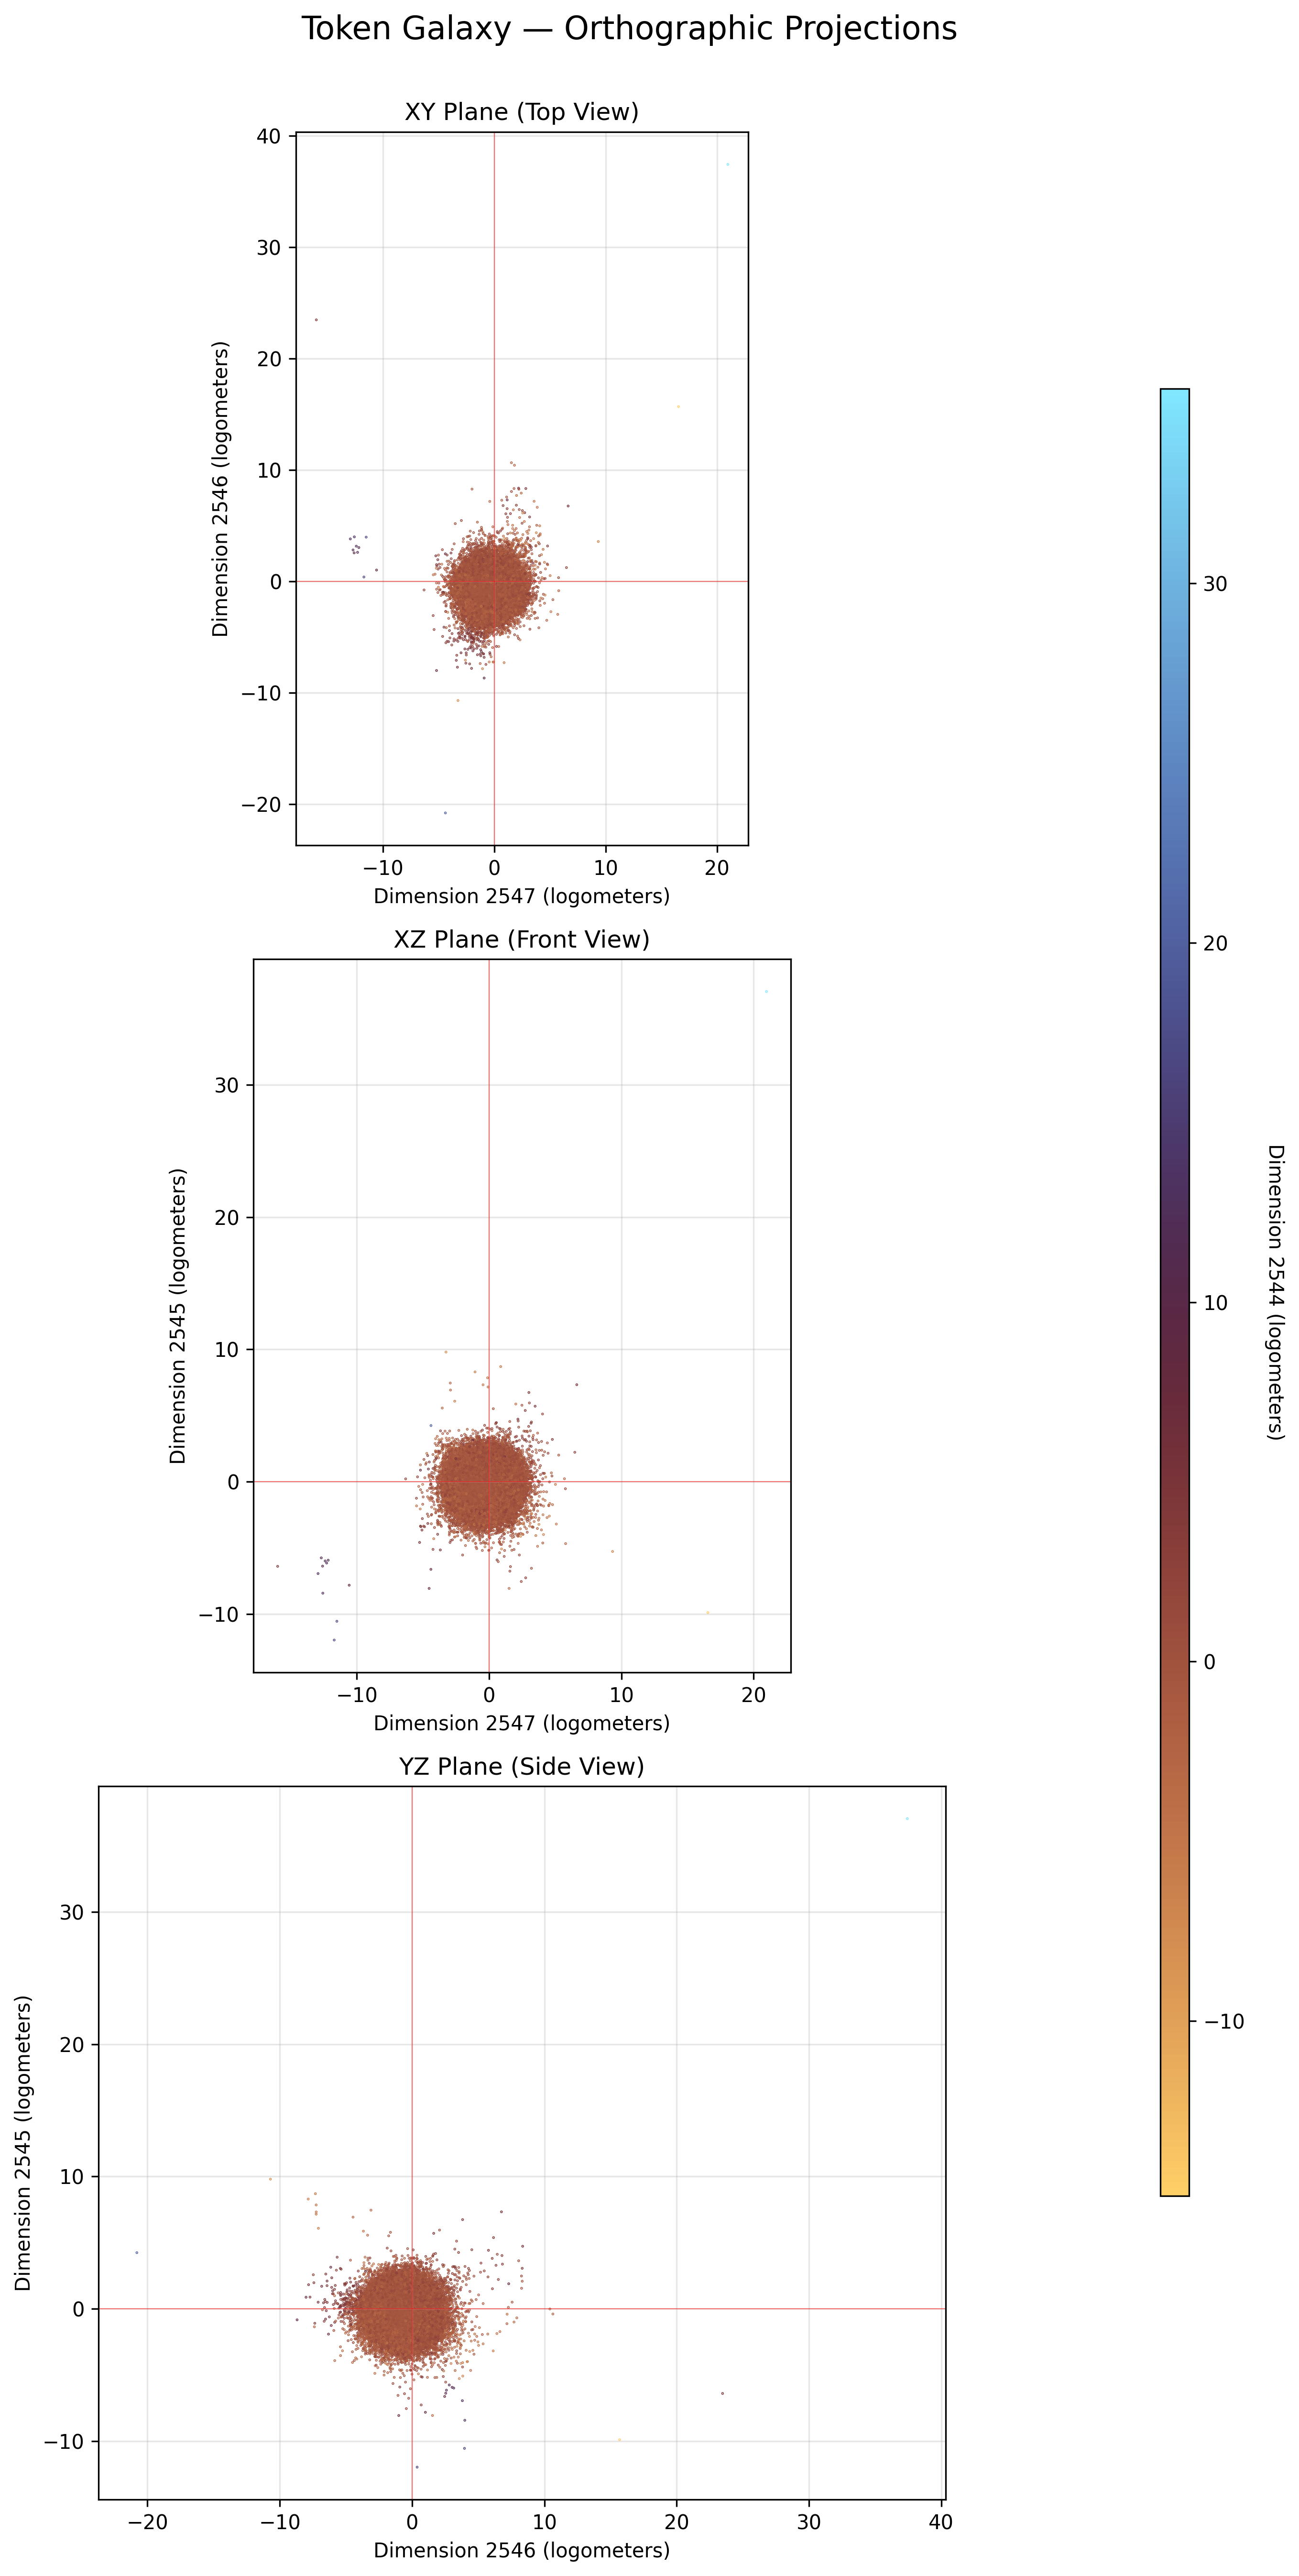


Plotted 151,936 tokens
X dimension: 2547
Y dimension: 2546
Z dimension: 2545
Color: Dimension 2544 (logometers)


In [76]:
fig, axes = plt.subplots(3, 1, figsize=FIGSIZE, dpi=DPI)
fig.suptitle('Token Galaxy — Orthographic Projections', fontsize=16, y=0.995)

# Plot 1: XY projection (top view)
ax1 = axes[0]
scatter1 = ax1.scatter(x_coords, y_coords, c=color_values, 
                       s=POINT_SIZE, alpha=ALPHA, cmap=COLORMAP,
                       rasterized=True)  # Rasterize for better performance
ax1.set_xlabel(f'Dimension {DIM_X} (logometers)')
ax1.set_ylabel(f'Dimension {DIM_Y} (logometers)')
ax1.set_title('XY Plane (Top View)')
ax1.set_aspect('equal', adjustable='box')
ax1.grid(True, alpha=0.3)
ax1.axhline(0, color='red', linewidth=0.5, alpha=0.5)
ax1.axvline(0, color='red', linewidth=0.5, alpha=0.5)

# Plot 2: XZ projection (front view)
ax2 = axes[1]
scatter2 = ax2.scatter(x_coords, z_coords, c=color_values,
                       s=POINT_SIZE, alpha=ALPHA, cmap=COLORMAP,
                       rasterized=True)
ax2.set_xlabel(f'Dimension {DIM_X} (logometers)')
ax2.set_ylabel(f'Dimension {DIM_Z} (logometers)')
ax2.set_title('XZ Plane (Front View)')
ax2.set_aspect('equal', adjustable='box')
ax2.grid(True, alpha=0.3)
ax2.axhline(0, color='red', linewidth=0.5, alpha=0.5)
ax2.axvline(0, color='red', linewidth=0.5, alpha=0.5)

# Plot 3: YZ projection (side view)
ax3 = axes[2]
scatter3 = ax3.scatter(y_coords, z_coords, c=color_values,
                       s=POINT_SIZE, alpha=ALPHA, cmap=COLORMAP,
                       rasterized=True)
ax3.set_xlabel(f'Dimension {DIM_Y} (logometers)')
ax3.set_ylabel(f'Dimension {DIM_Z} (logometers)')
ax3.set_title('YZ Plane (Side View)')
ax3.set_aspect('equal', adjustable='box')
ax3.grid(True, alpha=0.3)
ax3.axhline(0, color='red', linewidth=0.5, alpha=0.5)
ax3.axvline(0, color='red', linewidth=0.5, alpha=0.5)

# Add shared colorbar on the right
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.87, 0.15, 0.02, 0.7])  # [left, bottom, width, height]
cbar = fig.colorbar(scatter1, cax=cbar_ax)
cbar.set_label(color_label, rotation=270, labelpad=20)

plt.tight_layout(rect=[0, 0, 0.85, 0.99])
plt.show()

print(f"\nPlotted {len(x_coords):,} tokens")
print(f"X dimension: {DIM_X}")
print(f"Y dimension: {DIM_Y}")
print(f"Z dimension: {DIM_Z}")
print(f"Color: {color_label}")